In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from lib import filter_zeros, make_pairplot, make_corr_plot, make_countplot, get_PCA_sets, make_feature_distribution_plots, get_resampled_data, get_best_k_param, get_nb_hyperparams, get_log_reg_hyperparams, get_svm_hyperparams, get_dec_tree_hyperparams, model_eval_stats

In [2]:
diabetes = pd.read_csv('data/diabetes.csv')
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.851607,121.034601,69.124881,20.632400,80.865337,32.005044,0.471623,33.287770,0.348958
std,3.358411,32.133392,19.294297,15.864806,114.710197,7.872757,0.332260,11.782728,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036637,19.425593,0.000000
25%,1.042585,99.170912,62.865664,0.902628,0.000000,27.363929,0.241222,23.922459,0.000000
50%,2.975851,117.484187,71.626425,22.828627,31.852846,32.036785,0.371572,29.051297,0.000000
75%,6.061244,140.279716,79.362046,32.279551,127.675588,36.506122,0.623471,40.694005,1.000000
max,16.715548,200.031754,122.579531,100.423207,855.005651,66.980905,2.430805,80.889103,1.000000


In [3]:
X = diabetes.copy()
y = diabetes['Outcome']
float_cols = X.select_dtypes(include=['float']).columns
str_cols = X.select_dtypes(exclude=['number']).columns

filter_zeros(dataset=diabetes, cols=float_cols)
print(X.columns[X.isnull().any()])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

cols Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
Index([], dtype='object')


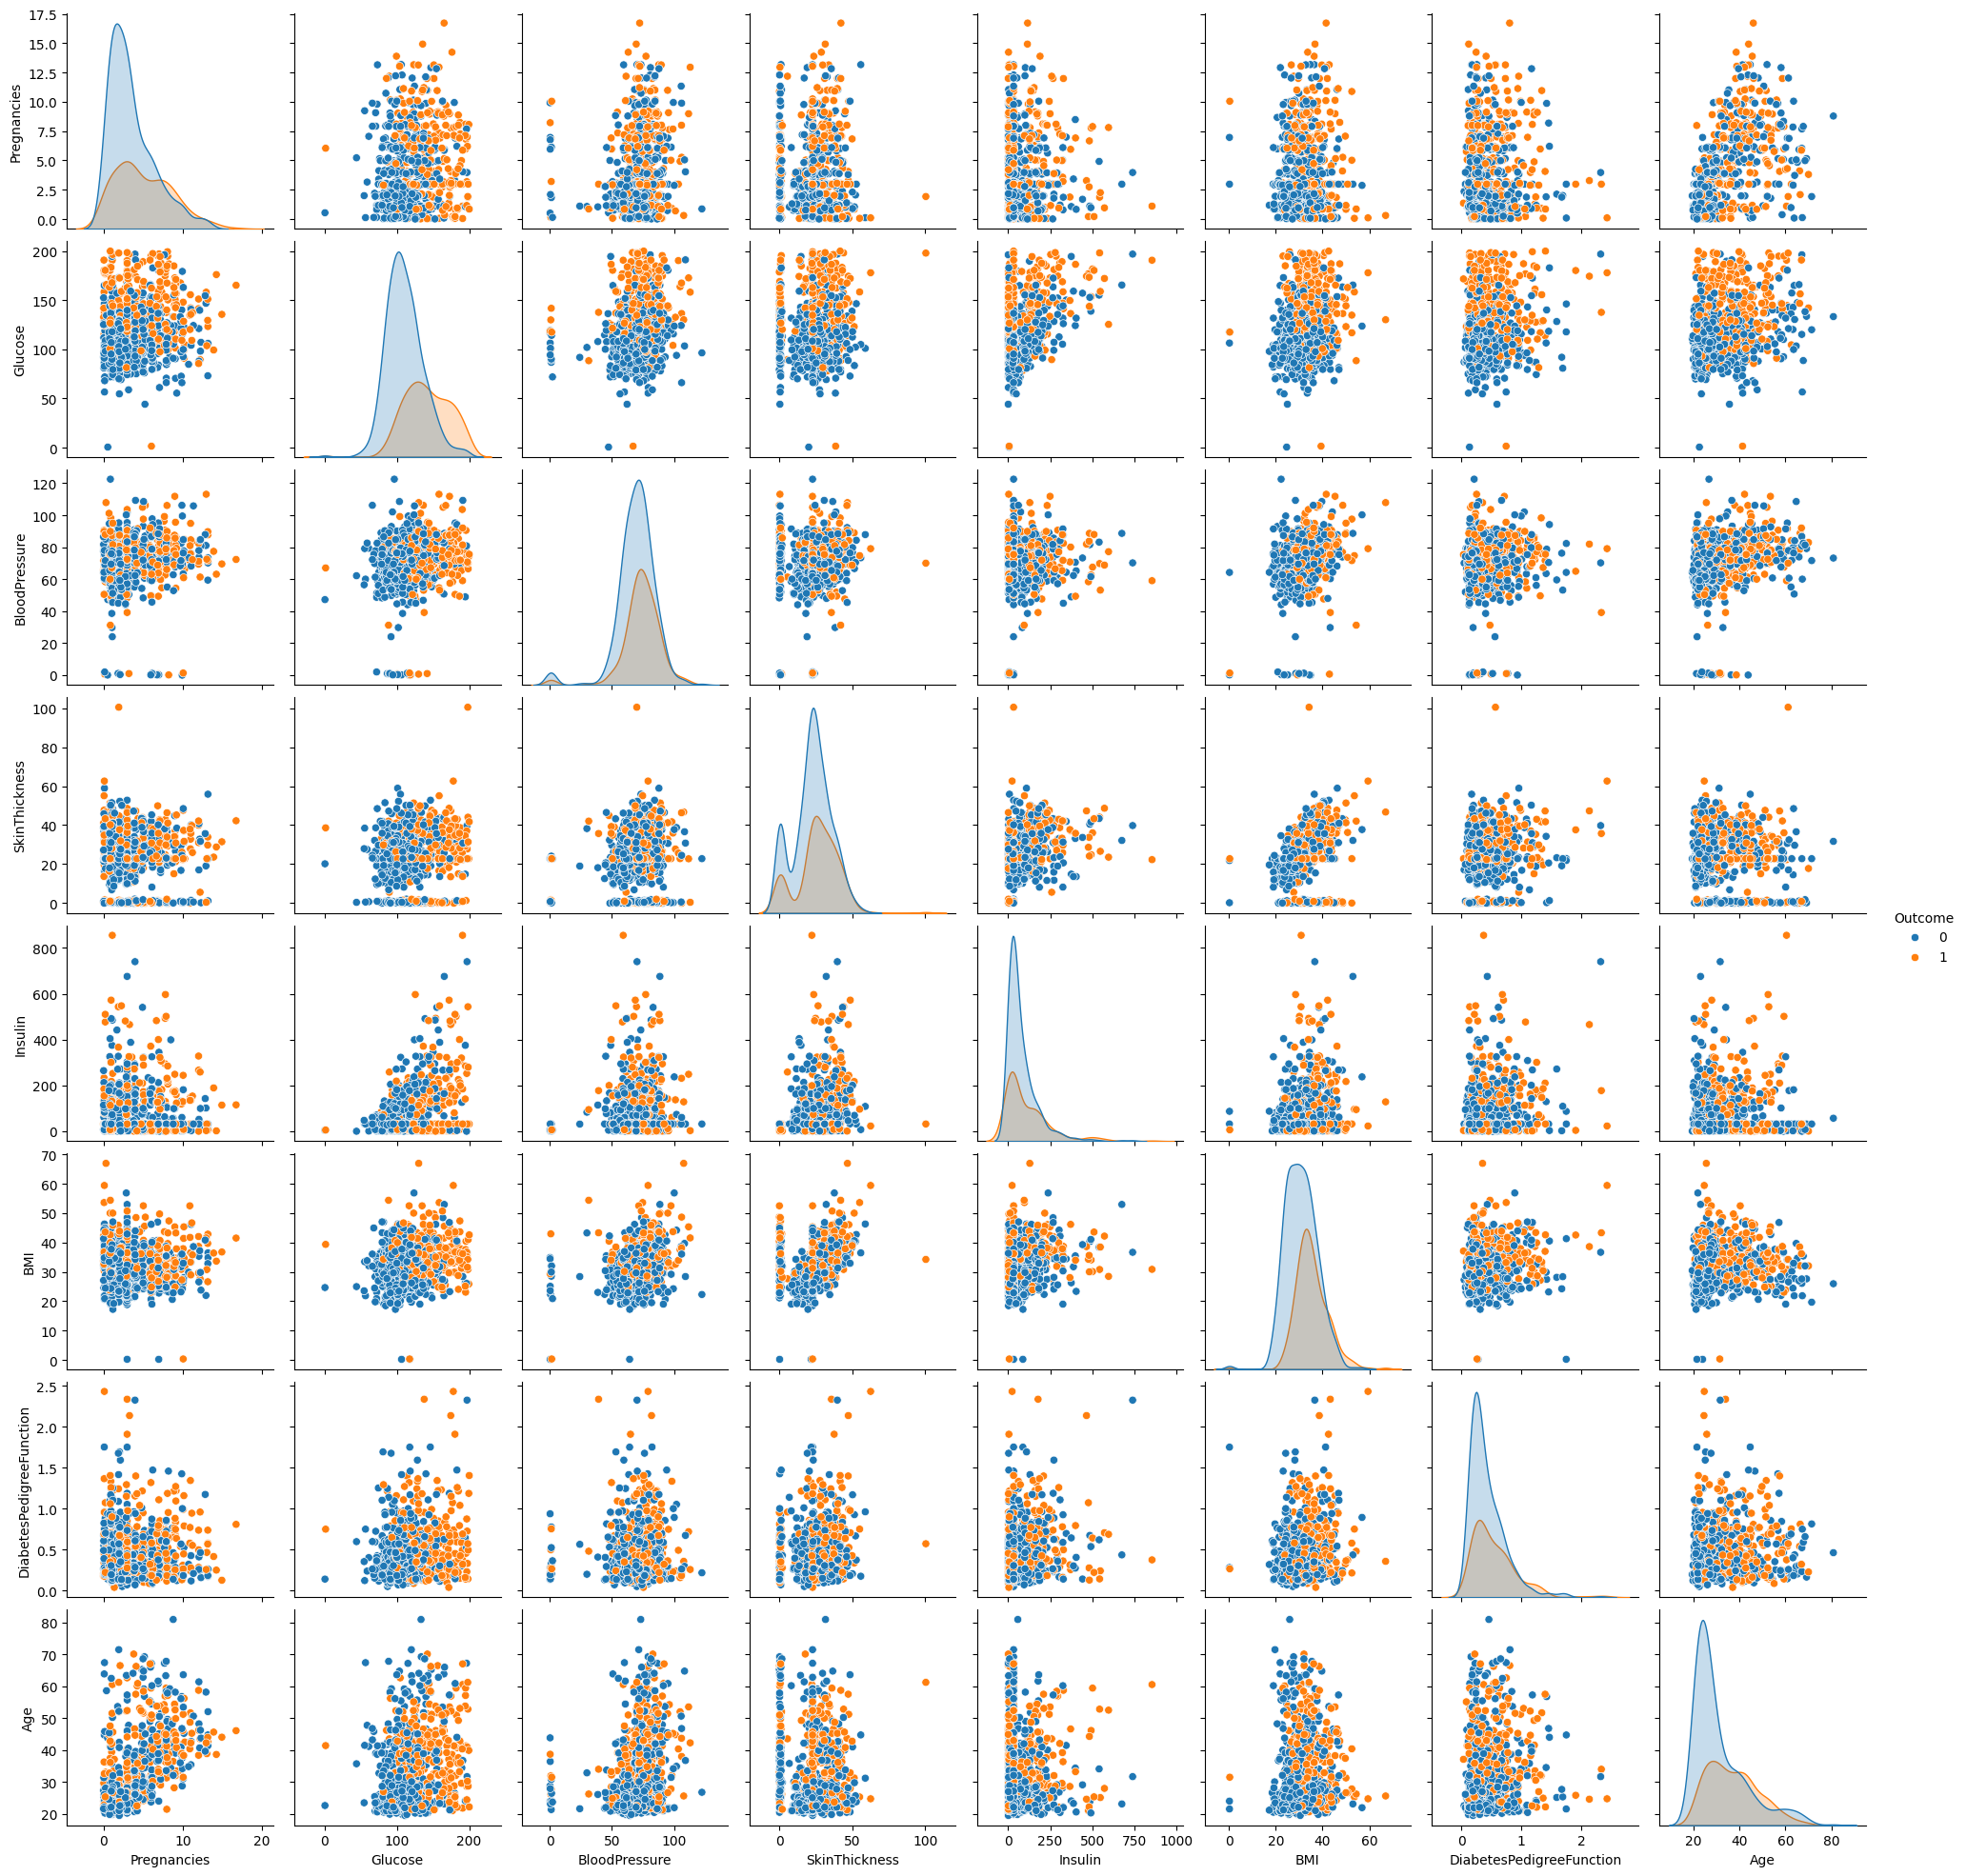

In [4]:
make_pairplot(df=diabetes, key='Outcome')

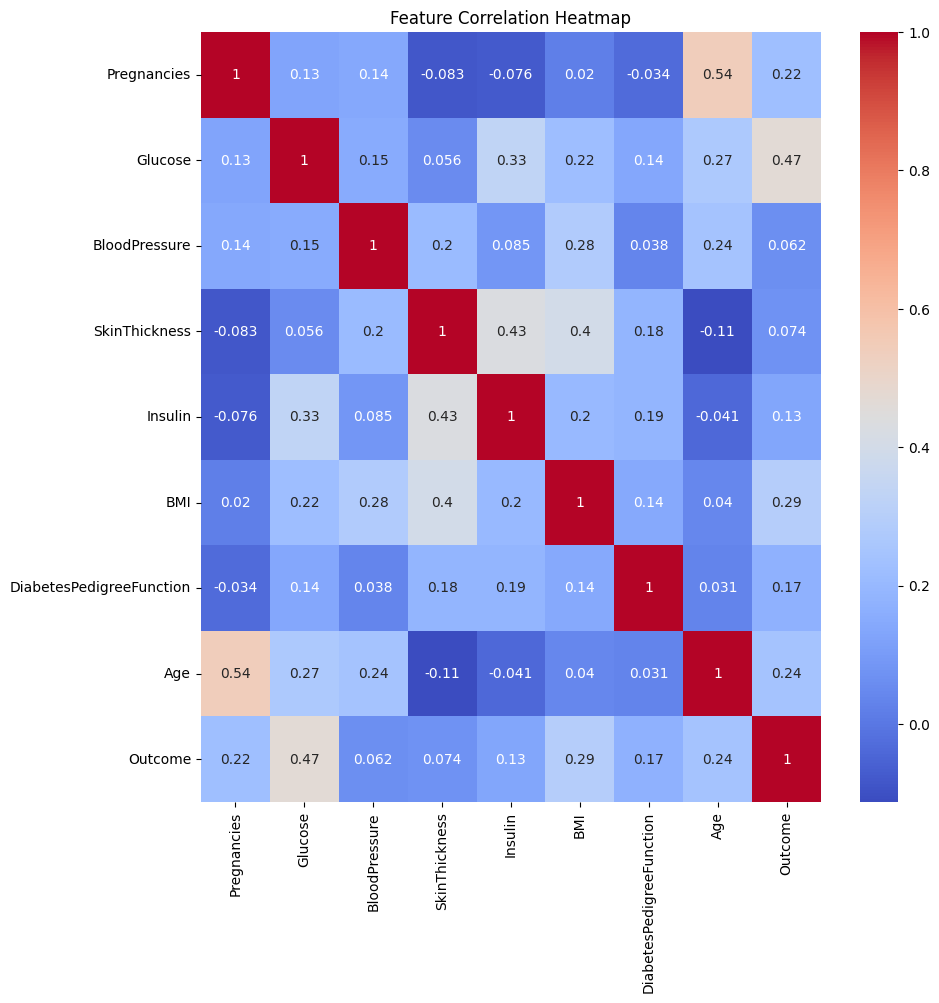

In [4]:
make_corr_plot(X, fig_x=10, fig_y=10)

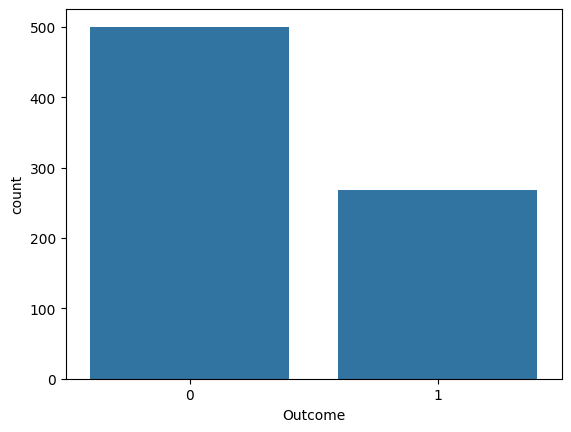

In [5]:
make_countplot(X, key='Outcome')

In [6]:
X_train, X_test = get_PCA_sets(X_train, X_test)

[0.90956725 0.04897267 0.02507483 0.00962971 0.00450995]


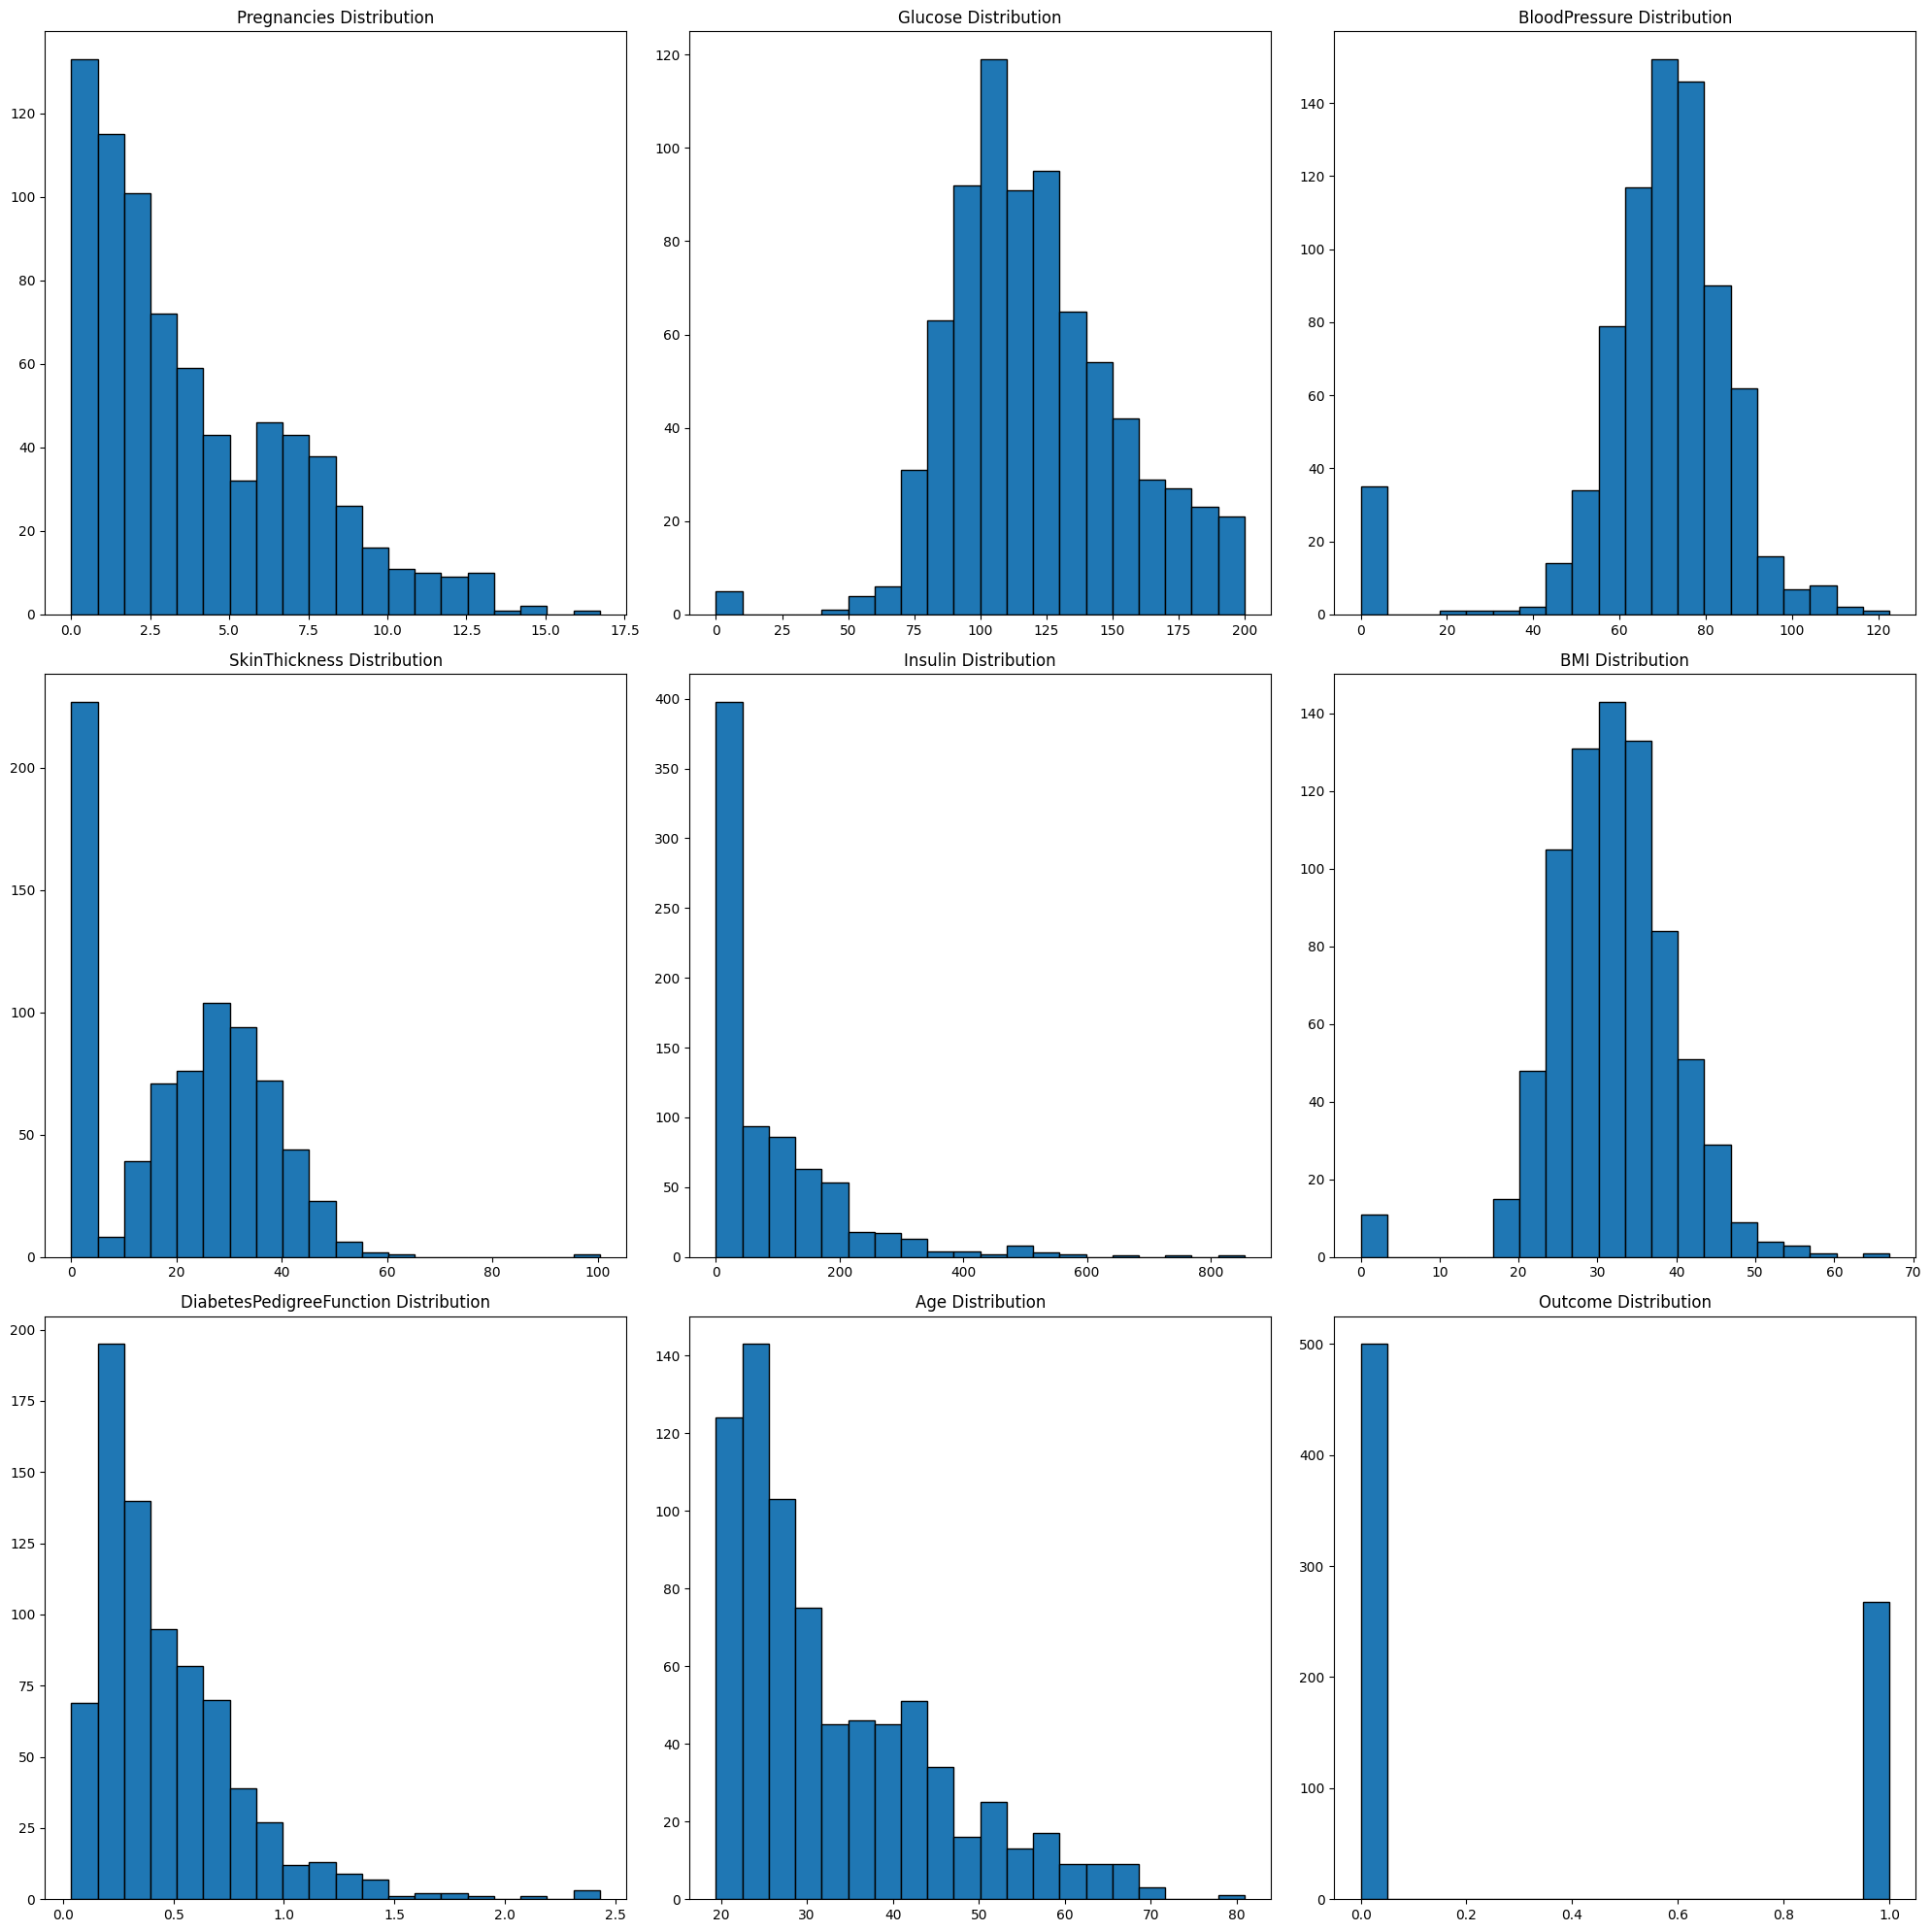

In [4]:
make_feature_distribution_plots(X)

In [4]:
X_train_resampled, y_train_resampled = get_resampled_data(X_train, y_train)

In [5]:
get_best_k_param(X_train, y_train, X_test, y_test)

k is 1 with score 0.6948051948051948
k is 2 with score 0.7142857142857143
k is 3 with score 0.7142857142857143
k is 4 with score 0.7207792207792207
k is 5 with score 0.7077922077922078
k is 6 with score 0.7207792207792207
k is 7 with score 0.7142857142857143
k is 8 with score 0.7077922077922078
k is 9 with score 0.6948051948051948
k is 10 with score 0.7012987012987013
k is 11 with score 0.6948051948051948
k is 12 with score 0.7207792207792207
k is 13 with score 0.7142857142857143
k is 14 with score 0.7207792207792207
k is 15 with score 0.7272727272727273
k is 16 with score 0.7272727272727273
k is 17 with score 0.7337662337662337
k is 18 with score 0.7142857142857143
k is 19 with score 0.7272727272727273
k is 20 with score 0.6948051948051948
k is 21 with score 0.7077922077922078
k is 22 with score 0.6948051948051948
k is 23 with score 0.7012987012987013
k is 24 with score 0.6948051948051948
k is 25 with score 0.7012987012987013
k is 26 with score 0.6818181818181818
k is 27 with score 0.

In [5]:
get_nb_hyperparams(X_train, y_train)

Best hyperparameters: {'var_smoothing': 1e-11}


In [7]:
get_log_reg_hyperparams(X_train, y_train)

Best hyperparameters: {'C': 0.25, 'max_iter': 50, 'penalty': 'l1'}


In [8]:
get_dec_tree_hyperparams(X_train, y_train)

Best hyperparameters: {'criterion': 'gini'}


In [9]:
get_svm_hyperparams(X_train, y_train)

Best hyperparameters: {'kernel': 'poly'}


0.7337662337662337
f1 scores are [0.742 0.71  0.645 0.823 0.689 0.705 0.787 0.803 0.787 0.754]
1.0
f1 scores are [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
f1 scores are [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
f1 scores are [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.7337662337662337
f1 scores are [0.742 0.726 0.677 0.903 0.77  0.787 0.803 0.803 0.721 0.754]
Metrics for original data


,kfold mean,kfold stddev,accuracy,precision,recall
KNeighborsClassifier(n_neighbors=17),0.744,0.054,0.733766,0.651163,0.518519
GaussianNB(var_smoothing=1e-11),1.000,0.000,1.000000,1.000000,1.000000
"LogisticRegression(C=0.25, max_iter=50, penalty='l1', random_state=42,\n solver='liblinear')",1.000,0.000,1.000000,1.000000,1.000000
DecisionTreeClassifier(random_state=42),1.000,0.000,1.000000,1.000000,1.000000
"SVC(kernel='poly', random_state=42)",0.769,0.058,0.733766,0.709677,0.407407


0.6493506493506493
f1 scores are [0.7   0.7   0.7   0.712 0.662 0.638 0.788 0.75  0.725 0.812]
1.0
f1 scores are [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
f1 scores are [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
f1 scores are [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.7272727272727273
f1 scores are [0.638 0.762 0.725 0.85  0.638 0.762 0.838 0.712 0.675 0.712]
Metrics for class balanced data


,kfold mean,kfold stddev,accuracy,precision,recall
KNeighborsClassifier(n_neighbors=17),0.719,0.05,0.649351,0.500000,0.685185
GaussianNB(var_smoothing=1e-11),1.000,0.00,1.000000,1.000000,1.000000
"LogisticRegression(C=0.25, max_iter=50, penalty='l1', random_state=42,\n solver='liblinear')",1.000,0.00,1.000000,1.000000,1.000000
DecisionTreeClassifier(random_state=42),1.000,0.00,1.000000,1.000000,1.000000
"SVC(kernel='poly', random_state=42)",0.731,0.07,0.727273,0.630435,0.537037


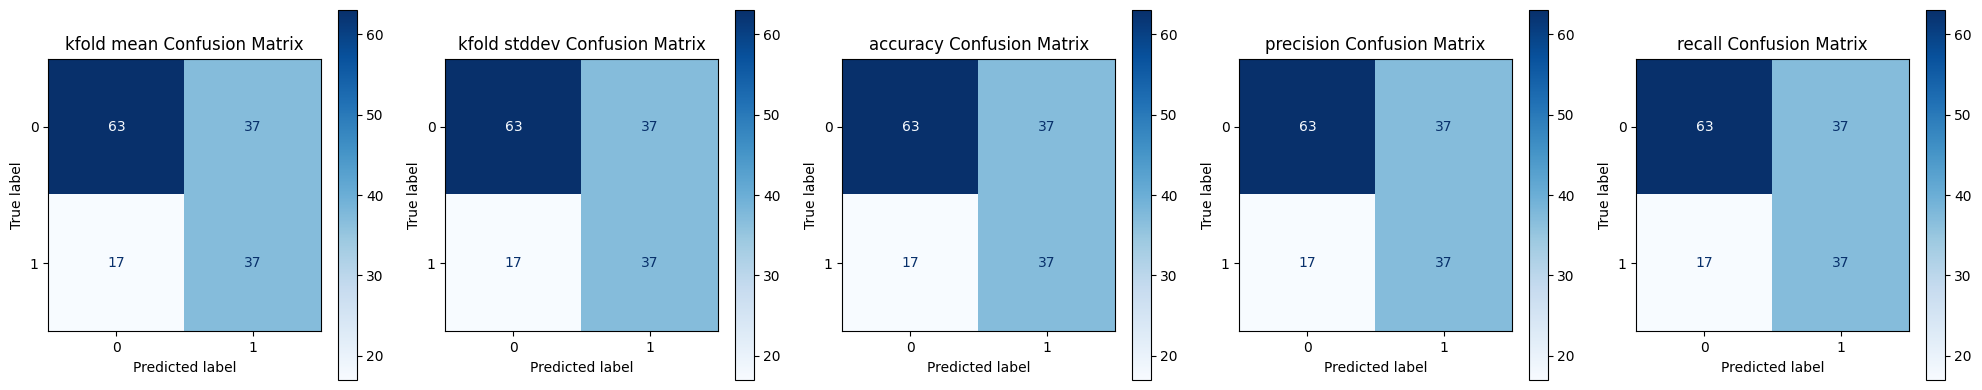

In [8]:
knn = KNeighborsClassifier(n_neighbors=17)
nb = GaussianNB(var_smoothing=1e-11)
log_reg = LogisticRegression(max_iter=50, C=0.25, solver='liblinear', penalty='l1', random_state=42) 
dec_tree = DecisionTreeClassifier(criterion='gini', random_state=42)
svm = SVC(kernel='poly', random_state=42) 

model_eval_stats(X_train, y_train, X_test, y_test, X_train_resampled, y_train_resampled, knn, nb, log_reg, dec_tree, svm)